### Installing and importing libraries

In [ ]:
!pip install easyocr
!pip install imutils

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### Image reading, blurring and grayscaling

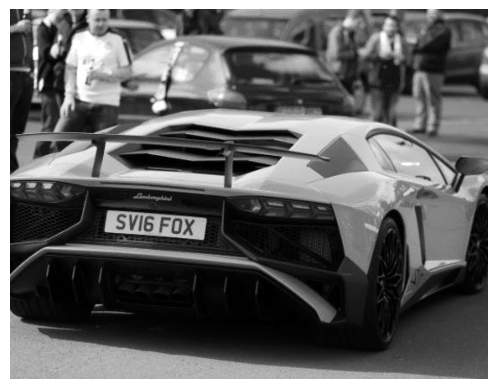

In [223]:
img = cv2.imread('car_images/car1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

### Applying a filter and defining edges

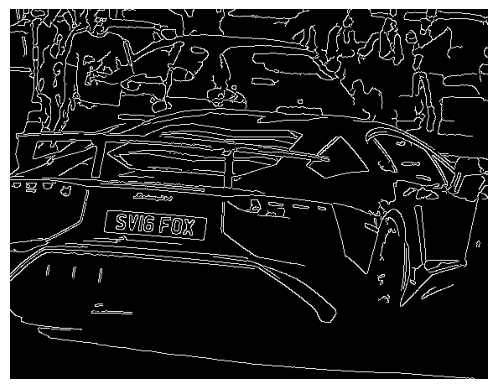

In [224]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # noise reduction
edged = cv2.Canny(bfilter, 30, 200)  # edge detection
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

### Finding license plate boundaries and applying a mask

In [225]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:100]

In [226]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 15, True)
    if len(approx) == 4:
        location = approx
        break

In [227]:
location

array([[[115, 242]],

       [[115, 266]],

       [[231, 274]],

       [[234, 249]]], dtype=int32)

In [228]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

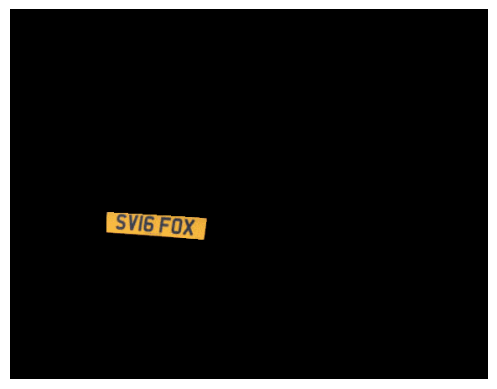

In [229]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [230]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

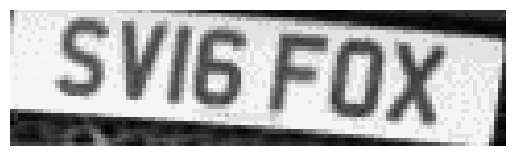

In [231]:
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

### Using EasyOCR to read text

In [30]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [232]:
result = reader.readtext(cropped_image)
result

[([[5, 0], [111, 0], [111, 33], [5, 33]], 'SVIG FOX', 0.3483504541989702)]

### Visualization of the result

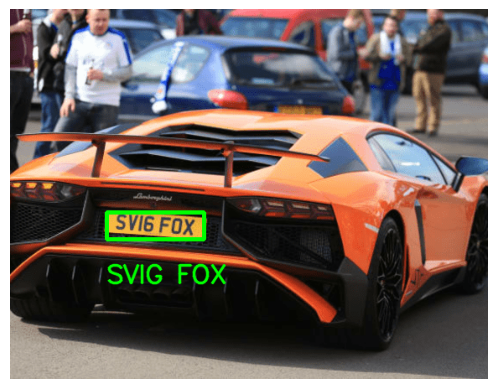

In [233]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Demonstration in all photos

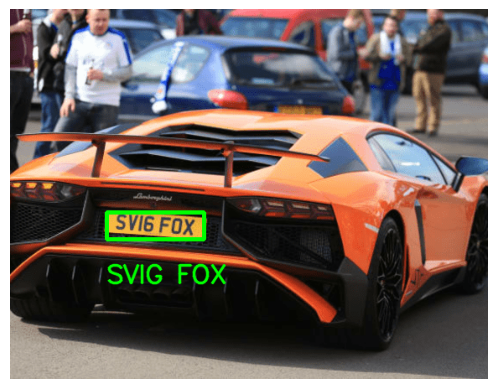

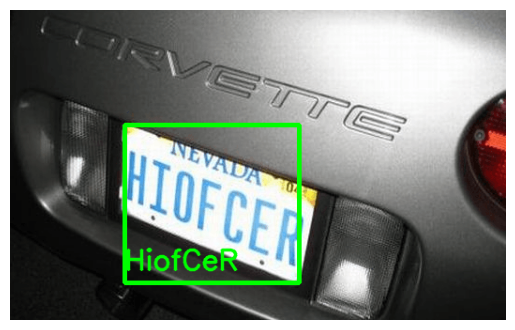

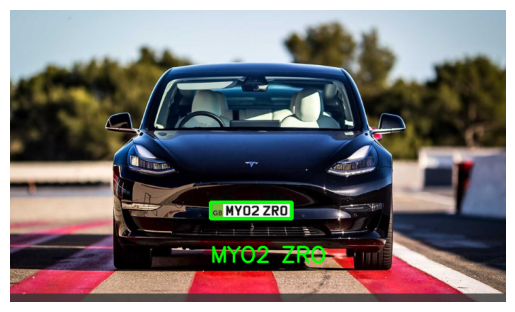

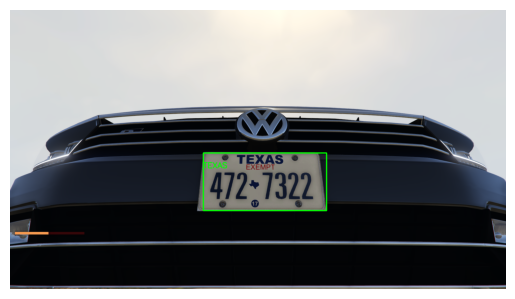

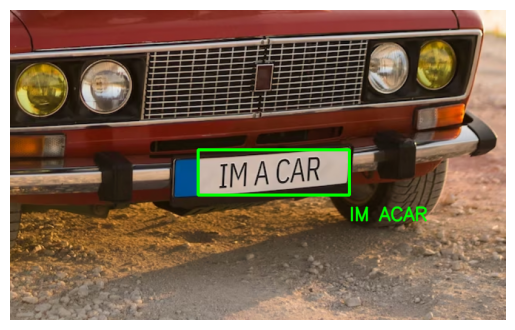

In [240]:
for car_num in range(1, 5+1):
    img = cv2.imread(f'car_images/car{car_num}.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 15, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    (x, y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    result = reader.readtext(cropped_image)
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()